In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!unzip /content/drive/MyDrive/vseros/enface.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: enface/e (5458).png     
  inflating: enface/e (5459).png     
  inflating: enface/e (546).png      
  inflating: enface/e (5460).png     
  inflating: enface/e (5461).png     
  inflating: enface/e (5462).png     
  inflating: enface/e (5463).png     
  inflating: enface/e (5464).png     
  inflating: enface/e (5465).png     
  inflating: enface/e (5466).png     
  inflating: enface/e (5467).png     
  inflating: enface/e (5468).png     
  inflating: enface/e (5469).png     
  inflating: enface/e (547).png      
  inflating: enface/e (5470).png     
  inflating: enface/e (5471).png     
  inflating: enface/e (5472).png     
  inflating: enface/e (5473).png     
  inflating: enface/e (5474).png     
  inflating: enface/e (5475).png     
  inflating: enface/e (5476).png     
  inflating: enface/e (5477).png     
  inflating: enface/e (5478).png     
  inflating: enface/e (5479).png     
  inflating: enface/

In [4]:
!unzip /content/drive/MyDrive/vseros/profile.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: profile/p (5488).png    
  inflating: profile/p (5489).png    
  inflating: profile/p (549).png     
  inflating: profile/p (5490).png    
  inflating: profile/p (5491).png    
  inflating: profile/p (5492).png    
  inflating: profile/p (5493).png    
  inflating: profile/p (5494).png    
  inflating: profile/p (5495).png    
  inflating: profile/p (5496).png    
  inflating: profile/p (5497).png    
  inflating: profile/p (5498).png    
  inflating: profile/p (5499).png    
  inflating: profile/p (55).png      
  inflating: profile/p (550).png     
  inflating: profile/p (5500).png    
  inflating: profile/p (5501).png    
  inflating: profile/p (5502).png    
  inflating: profile/p (5503).png    
  inflating: profile/p (5504).png    
  inflating: profile/p (5505).png    
  inflating: profile/p (5506).png    
  inflating: profile/p (5507).png    
  inflating: profile/p (5508).png    
  inflating: profile

In [5]:
!unzip /content/drive/MyDrive/vseros/test.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: test/ 5470.png          
  inflating: test/ 5471.png          
  inflating: test/ 5472.png          
  inflating: test/ 5473.png          
  inflating: test/ 5474.png          
  inflating: test/ 5475.png          
  inflating: test/ 5476.png          
  inflating: test/ 5477.png          
  inflating: test/ 5478.png          
  inflating: test/ 5479.png          
  inflating: test/ 548.png           
  inflating: test/ 5480.png          
  inflating: test/ 5481.png          
  inflating: test/ 5482.png          
  inflating: test/ 5483.png          
  inflating: test/ 5484.png          
  inflating: test/ 5485.png          
  inflating: test/ 5486.png          
  inflating: test/ 5487.png          
  inflating: test/ 5488.png          
  inflating: test/ 5489.png          
  inflating: test/ 549.png           
  inflating: test/ 5490.png          
  inflating: test/ 5491.png          
  inflating: test/ 5

In [6]:
import torch
import torchvision
from torchvision import transforms
from torchsummary import summary
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler, ConcatDataset
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau

from PIL import Image
import cv2
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from torchvision import models
from tqdm import tqdm_notebook, tqdm
import warnings
import os
from itertools import combinations
from glob import glob


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

In [7]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

class Metrics:
    @staticmethod
    def f1_score_binary(y_true, y_pred):
        return f1_score(y_true, y_pred)

    @staticmethod
    def precision_binary(y_true, y_pred):
        return precision_score(y_true, y_pred)

    @staticmethod
    def recall_binary(y_true, y_pred):
        return recall_score(y_true, y_pred)

    @staticmethod
    def accuracy_binary(y_true, y_pred):
        return accuracy_score(y_true, y_pred)

    @staticmethod
    def f1_score_multiclass(y_true, y_pred):
        return f1_score(y_true, y_pred, average='weighted')

    @staticmethod
    def precision_multiclass(y_true, y_pred):
        return precision_score(y_true, y_pred, average='weighted')

    @staticmethod
    def recall_multiclass(y_true, y_pred):
        return recall_score(y_true, y_pred, average='weighted')

    @staticmethod
    def accuracy_multiclass(y_true, y_pred):
        return accuracy_score(y_true, y_pred)

# Анализ данных

In [8]:
data = pd.DataFrame({'img_path':  glob('/content/profile/*') + glob('/content/enface/*'), 'class': [1 for _ in glob('/content/profile/*')] + [0 for _ in glob('/content/enface/*')]})
data

,img_path,class
0,/content/profile/p (10198).png,1
1,/content/profile/p (5871).png,1
2,/content/profile/p (1649).png,1
3,/content/profile/p (8683).png,1
4,/content/profile/p (10111).png,1
...,...,...
24223,/content/enface/e (9957).png,0
24224,/content/enface/e (4147).png,0
24225,/content/enface/e (11527).png,0
24226,/content/enface/e (1420).png,0


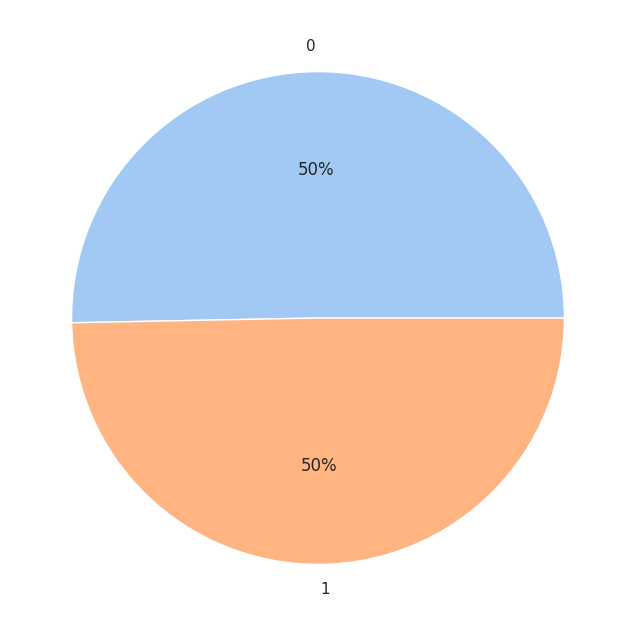

In [9]:
sns.set(rc={'figure.figsize': (15, 8)})
colors = sns.color_palette('pastel')[0:5]
labels = sorted(data['class'].unique())
dt = np.array([len(data[data['class'] == i])for i in labels])
plt.pie(dt, labels=labels, colors = colors, autopct='%.0f%%')
plt.show()

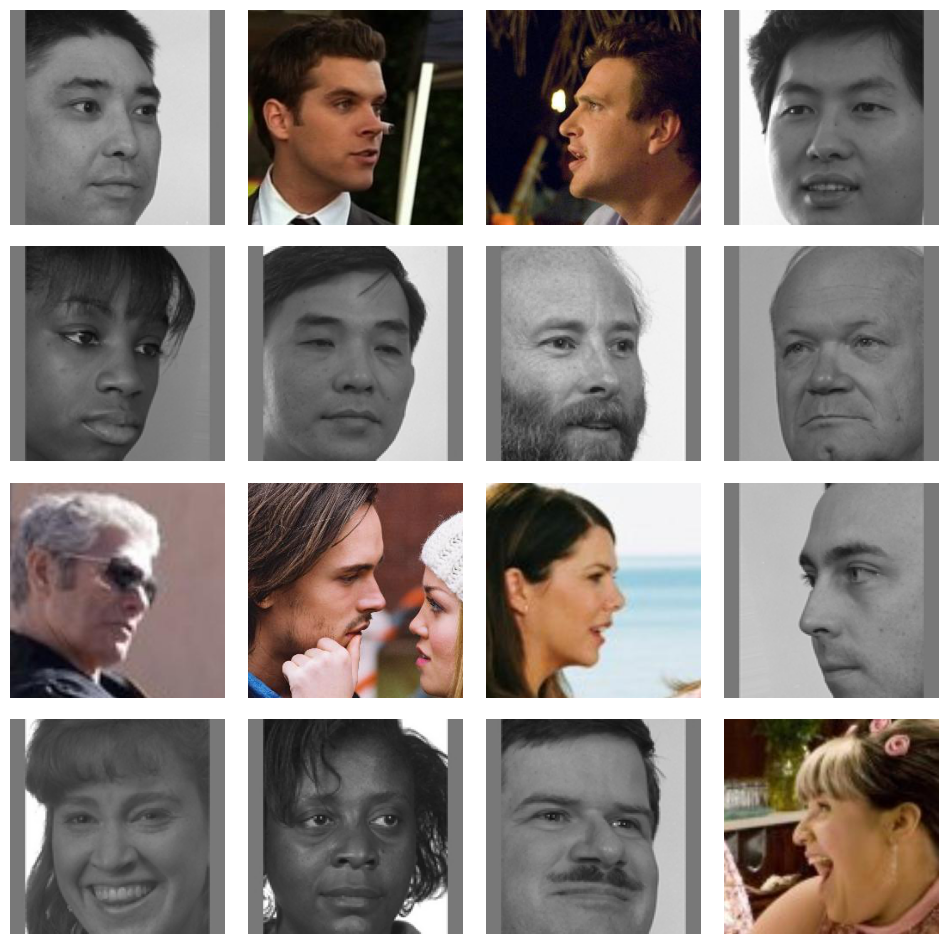

In [10]:
sns.set_theme()

fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for ax, img_path in zip(axes.flatten(), data[data['class'] == 1]['img_path'].to_list()):
    img = Image.open(img_path).convert('RGB')
    ax.imshow(img)
    ax.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

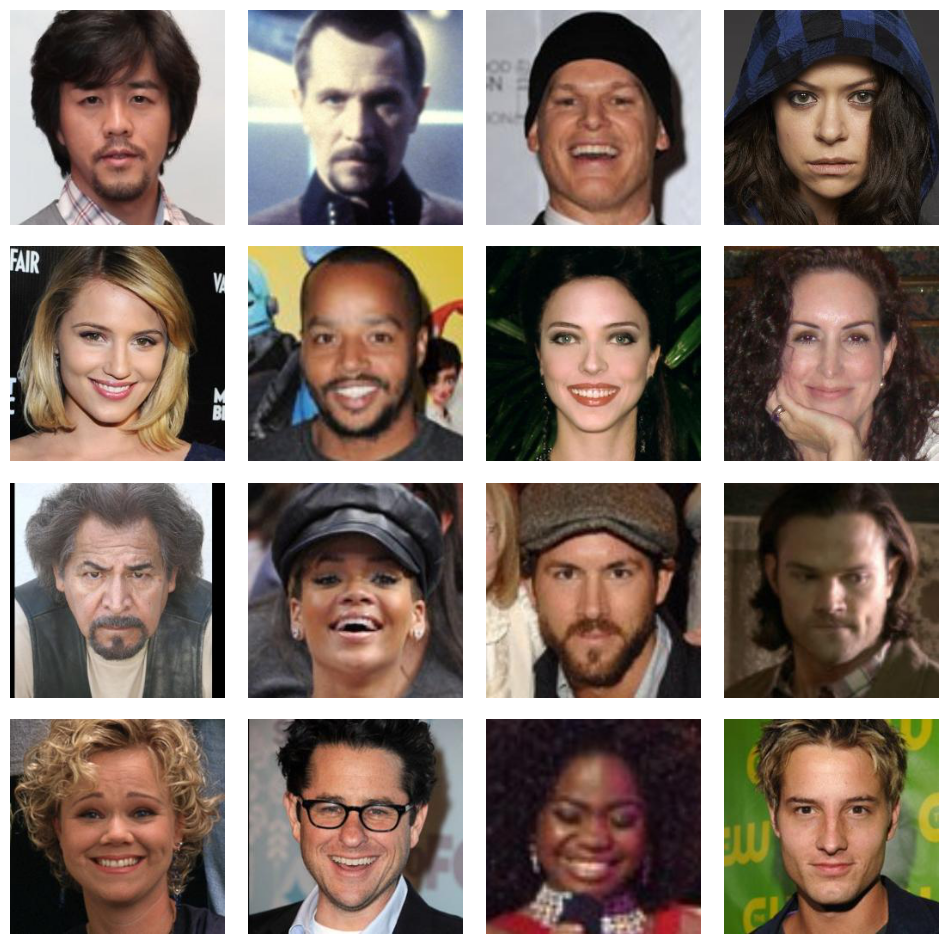

In [11]:
sns.set_theme()

fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for ax, img_path in zip(axes.flatten(), data[data['class'] == 0]['img_path'].to_list()):
    img = Image.open(img_path).convert('RGB')
    ax.imshow(img)
    ax.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

In [12]:
X_train, X_valid, Y_train, Y_valid = train_test_split(
    data['img_path'],
    data['class'],
    test_size=0.2,
    shuffle=True,
    random_state=42)

len(X_train), len(Y_train), len(X_valid), len(Y_valid)

(19382, 19382, 4846, 4846)

In [13]:
image_transform_augm = transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomChoice([
        transforms.RandomHorizontalFlip(p=1),
        transforms.RandomVerticalFlip(p=1)
    ]),
    transforms.RandomChoice([
        transforms.ColorJitter(brightness=1),
        transforms.GaussianBlur((3, 3))
    ]),
    transforms.Lambda(lambda x: np.array(x, dtype="float32") / 255),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


image_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.Lambda(lambda x: np.array(x, dtype="float32") / 255),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [14]:
class ProfileEnface_Dataset(Dataset):
    def __init__(self, dataframe: pd.DataFrame, transform=None, lable=False):
        self.paths_img = dataframe['path_imgs'].to_numpy()
        if lable:
            self.classes_img = dataframe['num_classes_img'].to_numpy()
        else:
            self.classes_img = 0
        if transform:
            self.transform = transform
        self.lable = lable

    def __len__(self):
        return len(self.paths_img)

    def __getitem__(self, idx):
        img_path = self.paths_img[idx]
        if self.lable:
            classes_img = self.classes_img[idx]
        else:
            classes_img = 0
        if not os.path.exists(img_path):
            raise FileNotFoundError(f"Image file {img_path} not found.")
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, classes_img

In [15]:
train = pd.DataFrame({
    'path_imgs': X_train,
    'num_classes_img': Y_train
})
valid = pd.DataFrame({
    'path_imgs': X_valid,
    'num_classes_img': Y_valid
})

train_orig_dataset = ProfileEnface_Dataset(dataframe=train, transform=image_transform, lable=True)
train_dataset = ProfileEnface_Dataset(dataframe=train, transform=image_transform_augm, lable=True)
valid_dataset = ProfileEnface_Dataset(dataframe=valid, transform=image_transform, lable=True)

In [17]:
batch_size = 64

train_orig_loader = DataLoader(train_orig_dataset, shuffle=True, batch_size=batch_size, num_workers=8, pin_memory=True)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size, num_workers=8, pin_memory=True)
valid_loader = DataLoader(valid_dataset, shuffle=False, batch_size=batch_size, num_workers=8, pin_memory=True)

# Transfer learning

In [18]:
transfer_model = models.resnet18(pretrained=True)
transfer_model.fc = nn.Linear(in_features=512, out_features=2, bias=True)
transfer_model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 123MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [19]:
summary(transfer_model, (3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           9,408
       BatchNorm2d-2         [-1, 64, 128, 128]             128
              ReLU-3         [-1, 64, 128, 128]               0
         MaxPool2d-4           [-1, 64, 64, 64]               0
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
              ReLU-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
             ReLU-10           [-1, 64, 64, 64]               0
       BasicBlock-11           [-1, 64, 64, 64]               0
           Conv2d-12           [-1, 64, 64, 64]          36,864
      BatchNorm2d-13           [-1, 64, 64, 64]             128
             ReLU-14           [-1, 64,

In [20]:
class Trainer_model:
    def __init__(self, model, device):
        self.model = model
        self.device = device

        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-3, amsgrad=True)
        self.scheduler = ReduceLROnPlateau(self.optimizer, mode='min', factor=0.1, patience=2)
        self.loss_function = nn.CrossEntropyLoss()
        self.metrics_functions = Metrics

    def train_one_epoch(self, data_loader, num_ep):
        self.model.train(True)
        total_loss = 0.0
        total_samples = 0
        metric_res = {
            'f1_score': 0.0,
            'precision': 0.0,
            'recall': 0.0,
            'accuracy': 0.0
        }
        print(f'Epoch train: {num_ep + 1}')
        print('-----------------------------------')
        for batch_index, batch in enumerate(tqdm(data_loader)):
            x_batch, y_batch = batch[0].to(self.device), batch[1].to(self.device)

            self.optimizer.zero_grad()
            output = self.model(x_batch)
            loss = self.loss_function(output.squeeze(), y_batch)

            batch_size = x_batch.size(0)
            total_loss += loss.item() * batch_size
            total_samples += batch_size

            output_argmax = torch.argmax(output, axis=1)
            metric_res['f1_score'] += self.metrics_functions.f1_score_binary(y_batch.cpu(), output_argmax.cpu()) * batch_size
            metric_res['precision'] += self.metrics_functions.precision_binary(y_batch.cpu(), output_argmax.cpu()) * batch_size
            metric_res['recall'] += self.metrics_functions.recall_binary(y_batch.cpu(), output_argmax.cpu()) * batch_size
            metric_res['accuracy'] += self.metrics_functions.accuracy_binary(y_batch.cpu(), output_argmax.cpu()) * batch_size

            loss.backward()
            self.optimizer.step()

        avg_loss = total_loss / total_samples
        print(f'loss train: {avg_loss}')
        metric_res = {i: metric_res[i] / total_samples for i in metric_res}
        for metric in metric_res:
            print(f'{metric}: {metric_res[metric]}')
        return avg_loss, metric_res

    def validation_one_epoch(self, data_loader):
        self.model.eval()
        total_loss = 0.0
        total_samples = 0
        metric_res = {
            'f1_score': 0.0,
            'precision': 0.0,
            'recall': 0.0,
            'accuracy': 0.0
        }
        for batch_index, batch in enumerate(tqdm(data_loader)):
            x_batch, y_batch = batch[0].to(self.device), batch[1].type(torch.LongTensor).to(self.device)
            with torch.no_grad():
                output = self.model(x_batch)
                loss = self.loss_function(output.squeeze(), y_batch)

            batch_size = x_batch.size(0)
            total_loss += loss.item() * batch_size
            total_samples += batch_size

            output_argmax = torch.argmax(output, axis=1)
            metric_res['f1_score'] += self.metrics_functions.f1_score_binary(y_batch.cpu(), output_argmax.cpu()) * batch_size
            metric_res['precision'] += self.metrics_functions.precision_binary(y_batch.cpu(), output_argmax.cpu()) * batch_size
            metric_res['recall'] += self.metrics_functions.recall_binary(y_batch.cpu(), output_argmax.cpu()) * batch_size
            metric_res['accuracy'] += self.metrics_functions.accuracy_binary(y_batch.cpu(), output_argmax.cpu()) * batch_size

        avg_loss = total_loss / total_samples
        print(f'Loss validation: {avg_loss}')
        metric_res = {i: metric_res[i] / total_samples for i in metric_res}
        for metric in metric_res:
            print(f'{metric}: {metric_res[metric]}')
        print('-----------------------------------')
        print()
        return avg_loss, metric_res

In [21]:
trainer = Trainer_model(transfer_model, device)

In [22]:
epoches = 8

train_losses = []
metric_res_train = {
        'f1_score': [],
        'precision': [],
        'recall': [],
        'accuracy': []
    }

valid_losses = []
metric_res_valid = {
        'f1_score': [],
        'precision': [],
        'recall': [],
        'accuracy': []
    }


best_metrics = {
    'f1_score': 0,
    'precision': 0,
    'recall': 0,
    'accuracy': 0
}
best_model_wts = 'model'
min_loss = 10**9

step_flag = 4

for epoch in range(epoches):
    if step_flag == 0:
        losses_train_epoch, metric_res_train_epoch = trainer.train_one_epoch(train_orig_loader, epoch)
        train_losses.append(losses_train_epoch)
        for i in metric_res_train_epoch:
            metric_res_train[i].append(metric_res_train_epoch[i])
    else:
        losses_train_epoch, metric_res_train_epoch = trainer.train_one_epoch(train_loader, epoch)
        train_losses.append(losses_train_epoch)
        for i in metric_res_train_epoch:
            metric_res_train[i].append(metric_res_train_epoch[i])

    losses_val_epoch, metric_res_val_epoch = trainer.validation_one_epoch(valid_loader)
    valid_losses.append(losses_val_epoch)
    for i in metric_res_val_epoch:
        metric_res_valid[i].append(metric_res_val_epoch[i])

    if any([best_metrics[i] < metric_res_val_epoch[i] for i in metric_res_val_epoch]) and min_loss > losses_val_epoch:
        best_model_wts = trainer.model.state_dict()
        best_metrics = {i: metric_res_val_epoch[i] for i in metric_res_val_epoch}
        min_loss = losses_val_epoch

    trainer.scheduler.step(losses_val_epoch)

Epoch train: 1
-----------------------------------


100%|██████████| 303/303 [03:33<00:00,  1.42it/s]


loss train: 0.057865052991681716
f1_score: 0.9767980426916583
precision: 0.975124544371107
recall: 0.9798139803671442
accuracy: 0.9776080899803942


  0%|          | 0/76 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 76/76 [00:31<00:00,  2.40it/s]


Loss validation: 0.013375362034183106
f1_score: 0.9959601819617008
precision: 0.9979252310696465
recall: 0.9941247015574082
accuracy: 0.996079240610813
-----------------------------------

Epoch train: 2
-----------------------------------


  0%|          | 0/303 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 303/303 [03:11<00:00,  1.58it/s]


loss train: 0.02466087984660193
f1_score: 0.9909637529769763
precision: 0.9889330767131106
recall: 0.9933379194129269
accuracy: 0.9909710040243525


  0%|          | 0/76 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 76/76 [00:28<00:00,  2.63it/s]


Loss validation: 0.013268800822017061
f1_score: 0.9972328118104127
precision: 0.9950425901216905
recall: 0.9995445941907295
accuracy: 0.9973173751547668
-----------------------------------

Epoch train: 3
-----------------------------------


  0%|          | 0/303 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 303/303 [03:10<00:00,  1.59it/s]


loss train: 0.02070891565944338
f1_score: 0.992483656638624
precision: 0.9896565464376716
recall: 0.9956981373036794
accuracy: 0.9928283974822


  0%|          | 0/76 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 76/76 [00:31<00:00,  2.39it/s]


Loss validation: 0.010692396322845662
f1_score: 0.9975654104073155
precision: 0.9969044044105433
recall: 0.9983126658349661
accuracy: 0.9975237309120925
-----------------------------------

Epoch train: 4
-----------------------------------


  0%|          | 0/303 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 303/303 [03:18<00:00,  1.53it/s]


loss train: 0.01496794572215942
f1_score: 0.9957276637769286
precision: 0.9950005918835406
recall: 0.9966169391906459
accuracy: 0.9956660819316892


  0%|          | 0/76 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 76/76 [00:29<00:00,  2.62it/s]


Loss validation: 0.01158005046719044
f1_score: 0.9963620727557656
precision: 0.9987829556424638
recall: 0.9940969049138461
accuracy: 0.9964919521254643
-----------------------------------

Epoch train: 5
-----------------------------------


  0%|          | 0/303 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 303/303 [03:11<00:00,  1.58it/s]


loss train: 0.016006332749923528
f1_score: 0.9945677750684795
precision: 0.9931479617551237
recall: 0.9961778057943027
accuracy: 0.9945826024146115


  0%|          | 0/76 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 76/76 [00:30<00:00,  2.48it/s]


Loss validation: 0.008233853464475685
f1_score: 0.9977481693168938
precision: 0.9991398953308109
recall: 0.9964422246971593
accuracy: 0.9977300866694181
-----------------------------------

Epoch train: 6
-----------------------------------


  0%|          | 0/303 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 303/303 [03:20<00:00,  1.51it/s]


loss train: 0.01311288526482303
f1_score: 0.9949390894766749
precision: 0.9945902469273662
recall: 0.9954813006226074
accuracy: 0.9949953565163554


  0%|          | 0/76 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 76/76 [00:31<00:00,  2.39it/s]


Loss validation: 0.013706033557809673
f1_score: 0.9956767758245457
precision: 0.9986116245920572
recall: 0.9928964500298562
accuracy: 0.9958728848534875
-----------------------------------

Epoch train: 7
-----------------------------------


  0%|          | 0/303 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 303/303 [03:15<00:00,  1.55it/s]


loss train: 0.015489247374231971
f1_score: 0.9946300005363725
precision: 0.9930940462821138
recall: 0.9963673494219393
accuracy: 0.9946857909400475


  0%|          | 0/76 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 76/76 [00:30<00:00,  2.53it/s]


Loss validation: 0.0076245574533077036
f1_score: 0.9984972915176279
precision: 0.9979110302433359
recall: 0.9991318826760783
accuracy: 0.9985555096987206
-----------------------------------

Epoch train: 8
-----------------------------------


  0%|          | 0/303 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 303/303 [03:14<00:00,  1.56it/s]


loss train: 0.010111193370483235
f1_score: 0.9968215640480746
precision: 0.9965241074719059
recall: 0.997234140944804
accuracy: 0.9969043442369209


  0%|          | 0/76 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 76/76 [00:30<00:00,  2.48it/s]

Loss validation: 0.009919430440231417
f1_score: 0.9978691947076958
precision: 0.9983734521084913
recall: 0.9974448327347981
accuracy: 0.9979364424267437
-----------------------------------



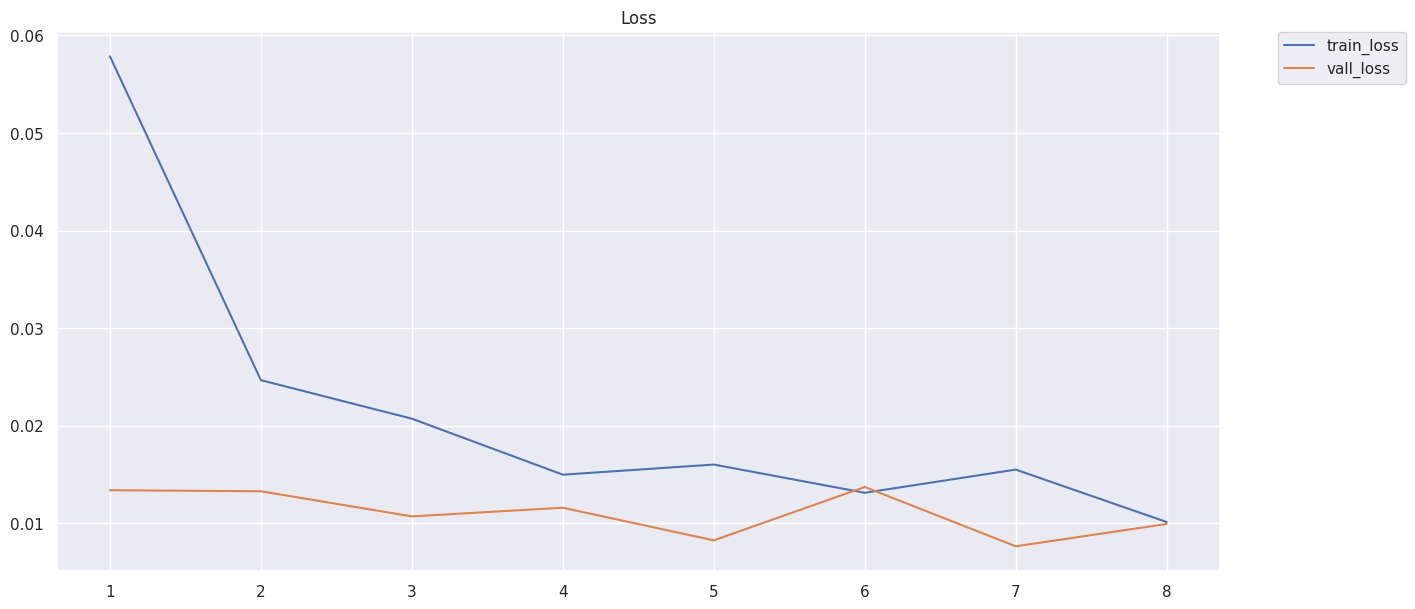

In [23]:
plt.figure(figsize=(15, 7))

plt.plot(np.arange(1, len(train_losses) + 1), train_losses, label="train_loss")
plt.plot(np.arange(1, len(valid_losses) + 1), valid_losses, label="vall_loss")
plt.title("Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

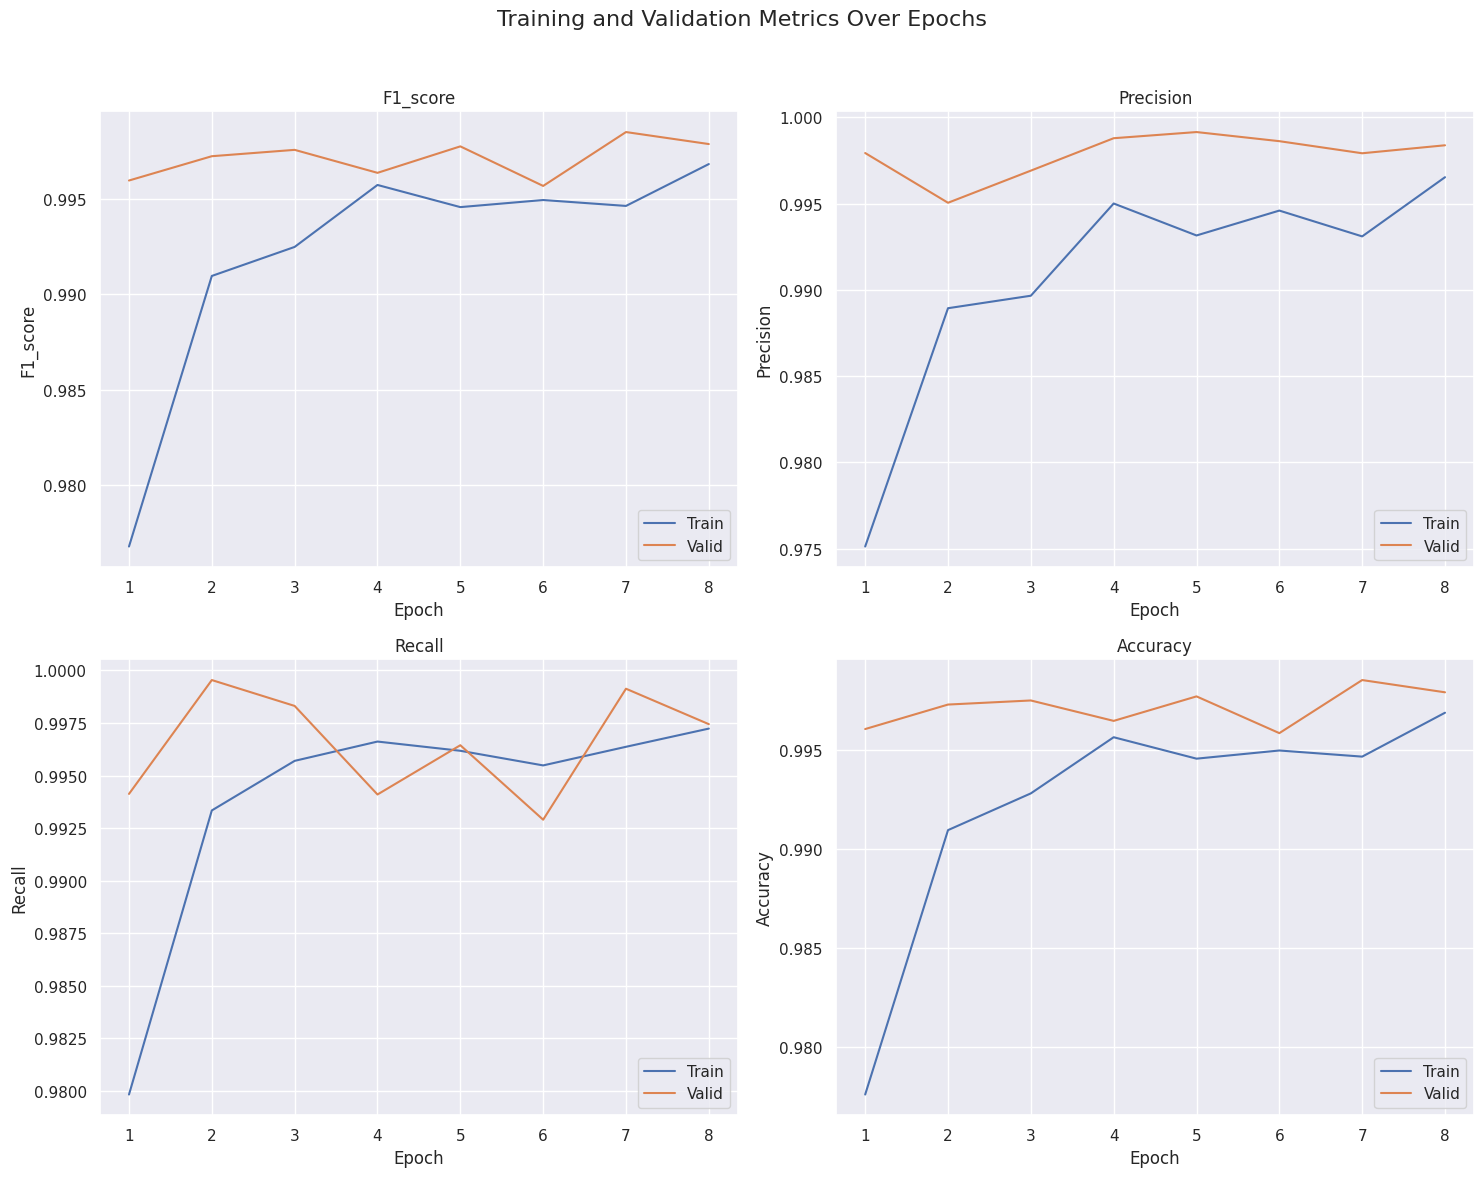

In [24]:
metrics = ['f1_score', 'precision', 'recall', 'accuracy']
epochs = range(1, len(metric_res_train['f1_score']) + 1)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Training and Validation Metrics Over Epochs', fontsize=16)
for ax, metric in zip(axes.flatten(), metrics):
    ax.plot(epochs, metric_res_train[metric], label='Train')
    ax.plot(epochs, metric_res_valid[metric], label='Valid')
    ax.set_title(metric.capitalize())
    ax.set_xlabel('Epoch')
    ax.set_ylabel(metric.capitalize())
    ax.legend()
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [25]:
print(f'best_metrics: {best_metrics}')
print(f'best_loss: {min_loss}')
transfer_model = trainer.model
transfer_model.load_state_dict(best_model_wts)

best_metrics: {'f1_score': 0.9984972915176279, 'precision': 0.9979110302433359, 'recall': 0.9991318826760783, 'accuracy': 0.9985555096987206}
best_loss: 0.0076245574533077036


<All keys matched successfully>

In [26]:
submit = pd.read_csv('/content/sample_submission (32).csv')
submit

,filename,label
0,1.png,1
1,2.png,1
2,3.png,1
3,5.png,1
4,6.png,1
...,...,...
11509,11578.png,1
11510,11579.png,1
11511,11580.png,1
11512,11581.png,1


In [31]:
sorted(glob('/content/test/*'))[:10]

['/content/test/ 1.png',
 '/content/test/ 10.png',
 '/content/test/ 100.png',
 '/content/test/ 1000.png',
 '/content/test/ 10000.png',
 '/content/test/ 10001.png',
 '/content/test/ 10002.png',
 '/content/test/ 10003.png',
 '/content/test/ 10004.png',
 '/content/test/ 10005.png']

In [32]:
test = pd.DataFrame({
    'path_imgs': submit['filename'].apply(lambda x: '/content/test/ ' + x)
})
test

,path_imgs
0,/content/test/ 1.png
1,/content/test/ 2.png
2,/content/test/ 3.png
3,/content/test/ 5.png
4,/content/test/ 6.png
...,...
11509,/content/test/ 11578.png
11510,/content/test/ 11579.png
11511,/content/test/ 11580.png
11512,/content/test/ 11581.png


In [33]:
test_dataset = ProfileEnface_Dataset(dataframe=test, transform=image_transform, lable=False)
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size, num_workers=8, pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [34]:
res = []
for batch_index, batch in enumerate(tqdm(test_dataloader)):
    x_batch, _ = batch[0].to(device), batch[1]
    with torch.no_grad():
        output = transfer_model(x_batch)
    output_argmax = torch.argmax(output, axis=1)
    res.extend([int(i) for i in output_argmax])
len(res)

100%|██████████| 180/180 [01:23<00:00,  2.15it/s]


11514

In [35]:
submit['label'] = res

In [36]:
submit

,filename,label
0,1.png,0
1,2.png,0
2,3.png,0
3,5.png,1
4,6.png,0
...,...,...
11509,11578.png,1
11510,11579.png,0
11511,11580.png,0
11512,11581.png,0


In [37]:
# submit['label'] = submit['label'].apply(lambda x: abs(x - 1))

In [38]:
submit['label'].value_counts()

label
0    6859
1    4655
Name: count, dtype: int64

In [39]:
submit

,filename,label
0,1.png,0
1,2.png,0
2,3.png,0
3,5.png,1
4,6.png,0
...,...,...
11509,11578.png,1
11510,11579.png,0
11511,11580.png,0
11512,11581.png,0


In [40]:
submit.to_csv('Enfance_and_Profile_resnet18.csv', index=False)